# 从0实现

In [1]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

$$y=w_1 x+ w_2 x + b$$

$$y=x_1 + 2x_2 +1$$

In [66]:
true_w, true_b = [1,2], 1
num_inputs, num_examples = 2, 1000

x = torch.randn(1000,2, dtype=torch.float32)   # 生成随机数x
y_hat = true_w[0] * x[:,0] + true_w[1] * x[:,1] + true_b   # function，

y_hat = y_hat + torch.tensor(np.random.normal(0,0.01,size=y_hat.size()), dtype=torch.float32)   # 实际值： y + add noise
(x[1],y[1])

(tensor([ 0.2036, -0.4152]), tensor([0.0049], grad_fn=<SelectBackward>))

In [67]:
y.size(), y_hat.shape, x.shape

(torch.Size([1000, 1]), torch.Size([1000]), torch.Size([1000, 2]))

In [68]:
len(x)

1000

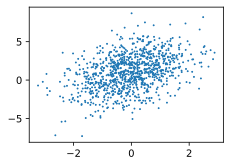

In [71]:
# plot
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

# # 在../d2lzh_pytorch里面添加上面两个函数后就可以这样导入
# import sys
# sys.path.append("..")
# from d2lzh_pytorch import * 

set_figsize()
plt.scatter(x[:, 0].numpy(), y_hat.numpy(), 1);

In [76]:
def f(x,w):
    return torch.mm(x,w) + b

def rsl(y,y_hat):
    return (y_hat-y.view(y_hat.size()))**2 /2

y = f(x,w)
loss = rsl(f(x,w),y_hat)
y.shape, loss.shape

(torch.Size([1000, 1]), torch.Size([1000]))

In [77]:
# initilize weight
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32, requires_grad=True)
b = torch.zeros(1, dtype=torch.float32,requires_grad=True)
# torch.mm(x,w)

In [81]:
y[n] - (w[0]*x[n,0]+w[1]*x[n,1]+b)

tensor([-0.0067], grad_fn=<SubBackward0>)

In [80]:
lr = 0.2 # learning rate\n",
iteration = 100000

b_lr = 0.0
w_lr = 0.0

# 存储参数，之后用于可视化
b_history = [b]
w_history = [w]


for i in range(iteration):

    b_grad = 0.0
    w_grad = [0.0, 0.0]
    for n in range(len(x)):        
        b_grad = b_grad  - 2.0*(y[n] - (w[0]*x[n,0]+w[1]*x[n,1]+b))*1.0
        w_grad = w_grad  - 2.0*(y[n] - (w[0]*x[n,0]+w[1]*x[n,1]+b))*x[n]
        
    b_lr = b_lr + b_grad**2
    w_lr = w_lr + w_grad**2
        

    b = b - lr/np.sqrt(b_lr) * b_grad 
    w = w - lr/np.sqrt(w_lr) * w_grad


    b_history.append(b)
    w_history.append(w)

TypeError: rsub() received an invalid combination of arguments - got (Tensor, list), but expected one of:
 * (Tensor input, Tensor other, *, Number alpha)
 * (Tensor input, Number other, Number alpha)


IndexError: index out of range in self

tensor([[ 0.5395,  0.5768],
        [ 0.0343,  0.2245],
        [-0.8377,  0.4333],
        [ 0.3075, -0.6178],
        [ 0.1271,  1.4181],
        [ 2.6077,  1.0008],
        [-0.8521,  1.9420],
        [-0.7341, -0.3396],
        [ 0.0865, -1.9583],
        [ 1.0883, -2.7395]]) tensor([ 3.3097,  3.5068,  1.0568,  6.9113, -0.3604,  6.0135, -4.0908,  3.8751,
        11.0506, 15.6880])


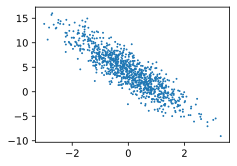

In [47]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs,
                       dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

# # 在../d2lzh_pytorch里面添加上面两个函数后就可以这样导入
# import sys
# sys.path.append("..")
# from d2lzh_pytorch import * 

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);
# 本函数已保存在d2lzh包中方便以后使用
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


In [48]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True) 
def linreg(X, w, b):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    return torch.mm(X, w) + b
def squared_loss(y_hat, y):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    # 注意这里返回的是向量, 另外, pytorch里的MSELoss并没有除以 2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2
def sgd(params, lr, batch_size):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数

        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))


epoch 1, loss 0.034410
epoch 2, loss 0.000124
epoch 3, loss 0.000048


In [49]:
print(true_w, '\n', w)
print(true_b, '\n', b)


[2, -3.4] 
 tensor([[ 2.0003],
        [-3.4002]], requires_grad=True)
4.2 
 tensor([4.1994], requires_grad=True)
